Yeison Mayorga Gamboa -
Zamir Granados Peñaloza -
Heyner David Marquez Garnica

#### Link:  https://www.kaggle.com/datasets/ochid7/a-dataset-of-movie-information-and-rating/data

# **Base de datos de películas: con calificaciones y género**

---



---


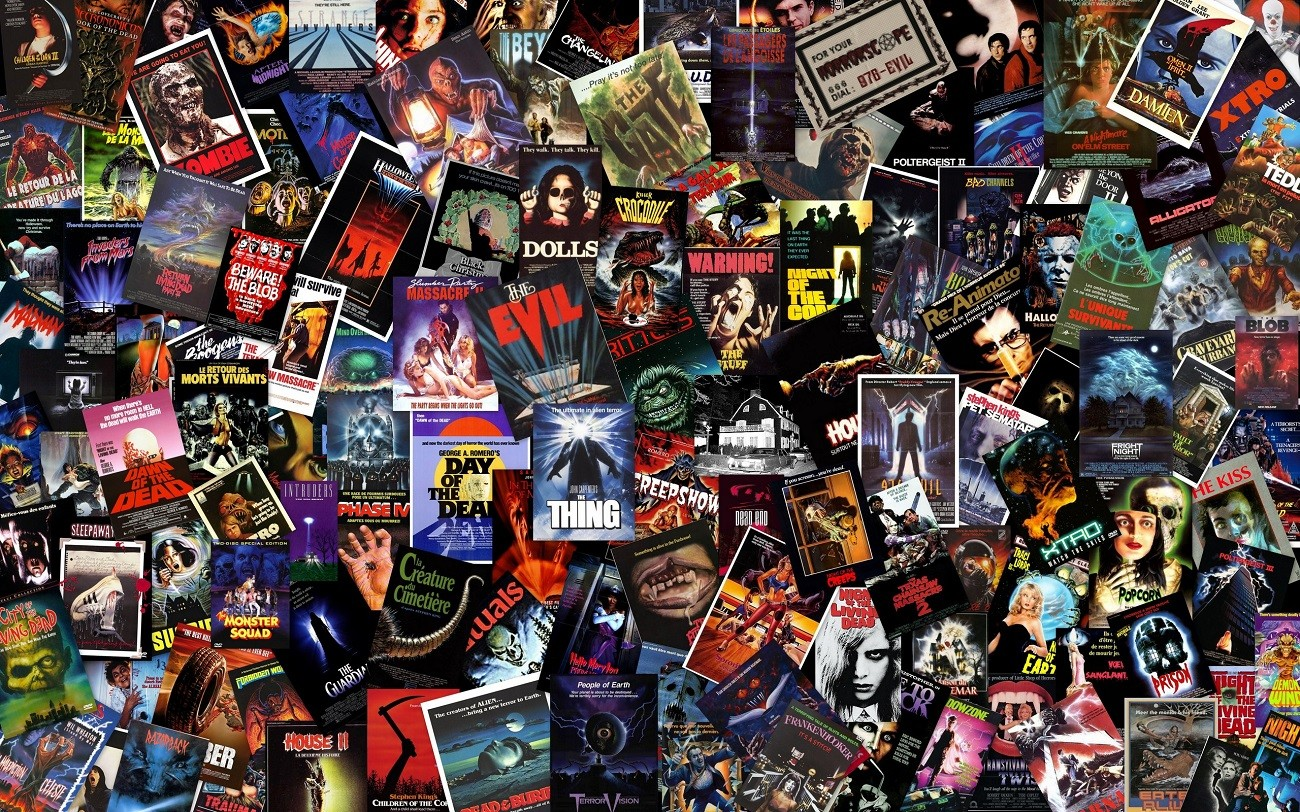



Dataset de Películas de IMDb  

Este conjunto de datos contiene información sobre las **1000 mejores películas en inglés**, según su calificación en IMDb. Cada película está acompañada de datos relevantes, como su **género, director, elenco, presupuesto, ingresos en taquilla y una breve descripción**.  

Este dataset es ideal para realizar análisis de clasificacion en la industria cinematográfica y desarrollar modelos de **predicción y recomendación** en el ámbito del entretenimiento. Algunas aplicaciones clave incluyen:  

- **Sistema de recomendación de películas:** Filtrar y sugerir películas según el género o la calificación de los usuarios.  
- **Predicción de ingresos en taquilla:** Determinar el impacto de factores como el presupuesto, el género y la fecha de estreno en los ingresos de una película.  
- **Predicción de calificación:** Estimar la calificación IMDb en función del género, director, elenco y otros atributos.  

Este dataset ofrece una visión detallada del desempeño de las películas en la industria y permite aplicar técnicas de **machine learning, análisis estadístico y visualización de datos** para obtener información valiosa sobre las tendencias del cine.

In [1]:
#Subir el archivo .cvs

from google.colab import files
uploaded = files.upload()

Saving movie.csv to movie.csv


# LIBRERIAS


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df = pd.read_csv("movie.csv")

In [3]:
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   rank           1000 non-null   int64  
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 125.1+ KB


In [4]:
df.head()

,rank,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,2,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,3,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,4,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,5,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


# **PRIMERA ENTREGA**

In [5]:
print("\nDescripción estadística de las columnas numéricas:")
desc_stats = df.describe().loc[['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']]
desc_stats = desc_stats.drop(columns=['rank'])
desc_stats.T.style.background_gradient(axis=1)


Descripción estadística de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
IMDB_Rating,1000.000000,7.949300,0.275491,7.600000,7.700000,7.900000,8.100000,9.300000
Meta_score,843.000000,77.971530,12.376099,28.000000,70.000000,79.000000,87.000000,100.000000
No_of_Votes,1000.000000,273692.911000,327372.703934,25088.000000,55526.250000,138548.500000,374161.250000,2343110.000000


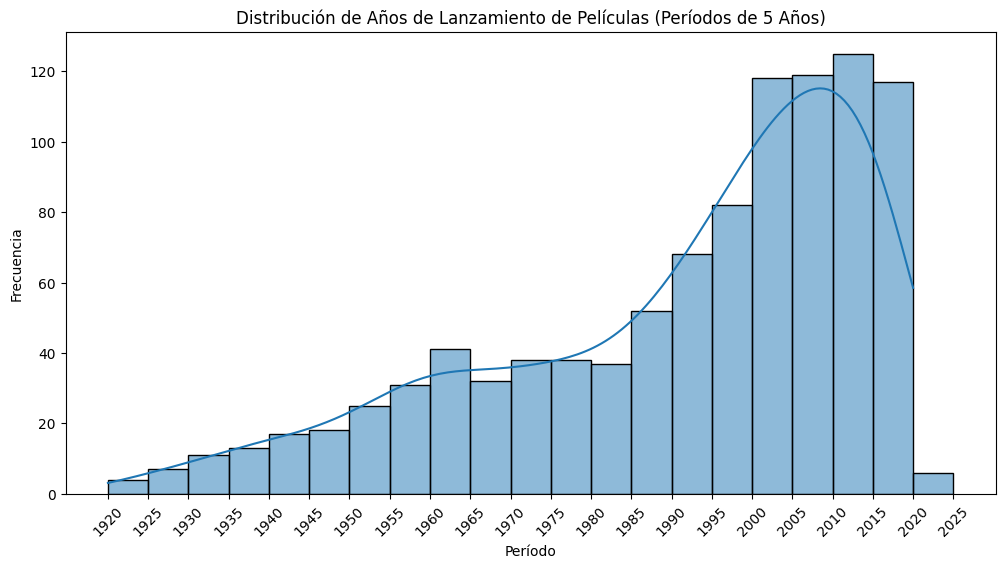

In [ ]:
df.loc[:, 'Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')
df = df.dropna(subset=['Released_Year'])

min_year = int(df['Released_Year'].min()) // 5 * 5
max_year = int(df['Released_Year'].max()) // 5 * 5 + 5
bins = np.arange(min_year, max_year + 1, 5)

plt.figure(figsize=(12,6))
sns.histplot(df['Released_Year'], bins=bins, kde=True)
plt.title('Distribución de Años de Lanzamiento de Películas (Períodos de 5 Años)')
plt.xlabel('Período')
plt.ylabel('Frecuencia')
plt.xticks(bins, rotation=45)
plt.show()

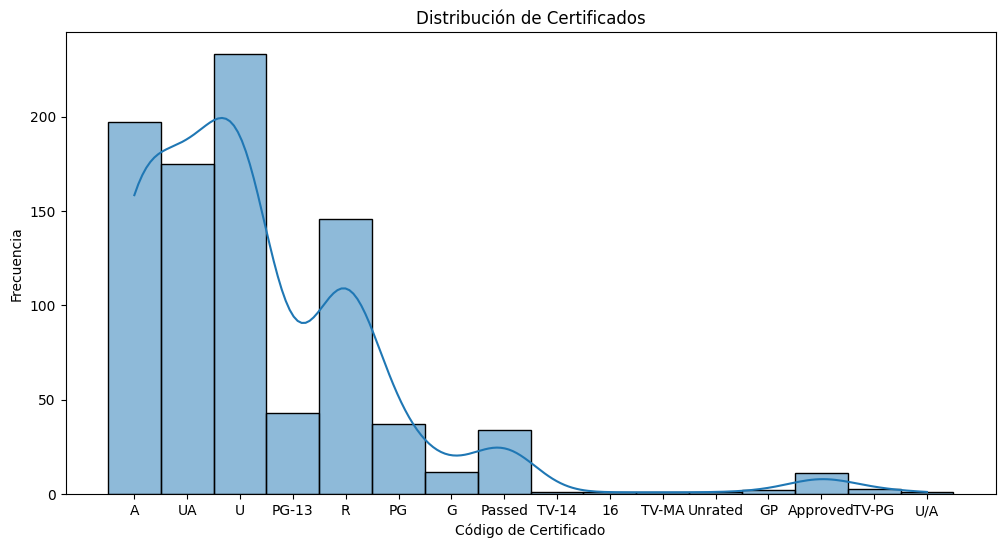

In [ ]:
#Distribucion de Certificados

plt.figure(figsize=(12,6))
sns.histplot(df['Certificate'], bins=20, kde=True)
plt.title('Distribución de Certificados')
plt.xlabel('Código de Certificado')
plt.ylabel('Frecuencia')

plt.show()

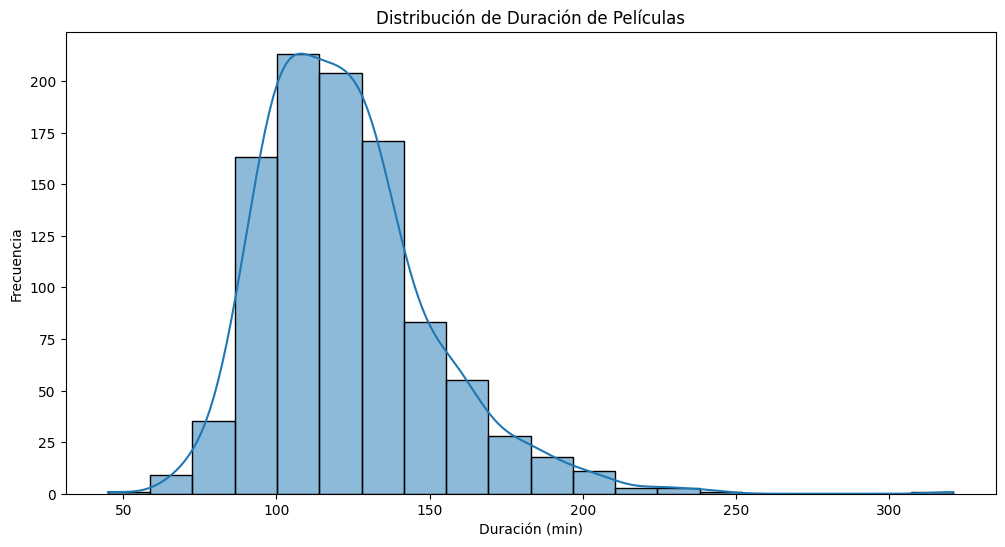

In [ ]:
# Verificar y convertir la columna
df['Runtime'] = df['Runtime'].astype(str).str.replace(' min', '', regex=False)
df['Runtime'] = pd.to_numeric(df['Runtime'], errors='coerce')  # Convertir a número

plt.figure(figsize=(12,6))
sns.histplot(df['Runtime'], bins=20, kde=True)
plt.title('Distribución de Duración de Películas')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.show()

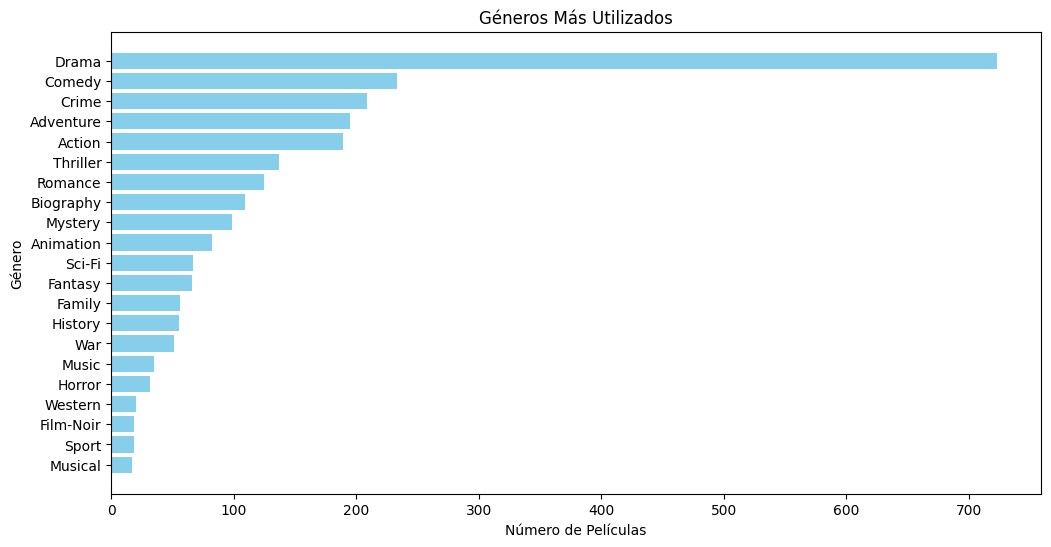

In [ ]:
genres = ['Romance', 'Biography', 'Comedy', 'Animation', 'Mystery', 'Film-Noir', 'Family', 'Crime',
          'History', 'Fantasy', 'Action', 'Western', 'Sport', 'Music', 'Musical', 'Horror',
          'Thriller', 'War', 'Drama', 'Adventure', 'Sci-Fi']

genre_numbers = {genre: i for i, genre in enumerate(genres)}
df['Genre'] = df['Genre'].fillna('')

#Cuenta la frecuencia de cada genero en el dataset
genre_counts = df['Genre'].str.split(',').explode().str.strip().value_counts()
genre_counts = genre_counts[genre_counts.index.isin(genres)]

plt.figure(figsize=(12, 6))
plt.barh(genre_counts.index, genre_counts.values, color='skyblue')
plt.xlabel("Número de Películas")
plt.ylabel("Género")
plt.title("Géneros Más Utilizados")
plt.gca().invert_yaxis()
plt.show()

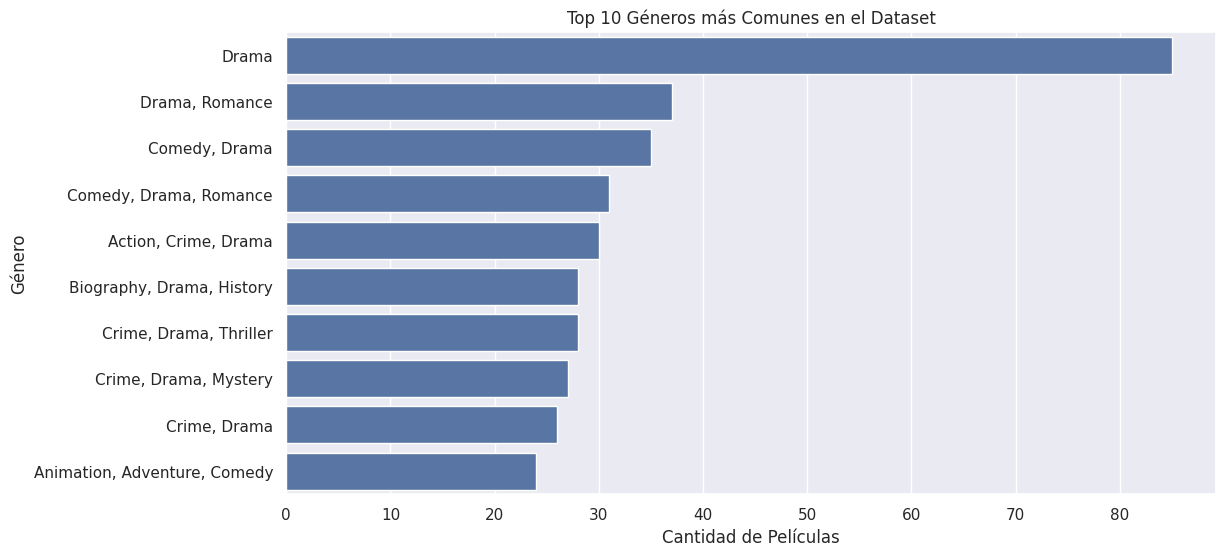

In [ ]:
#TOp 10 generos mas comunes en el dataset

genre_counts = df['Genre'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 10 Géneros más Comunes en el Dataset')
plt.xlabel('Cantidad de Películas')
plt.ylabel('Género')
plt.show()

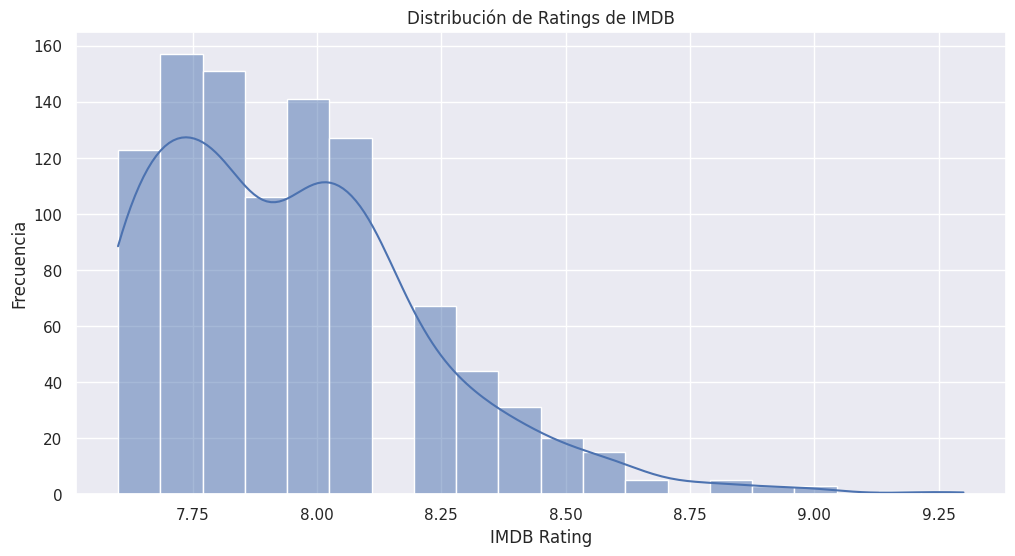

In [ ]:
plt.figure(figsize=(12,6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribución de Ratings de IMDB')
plt.xlabel('IMDB Rating')
plt.ylabel('Frecuencia')
plt.show()

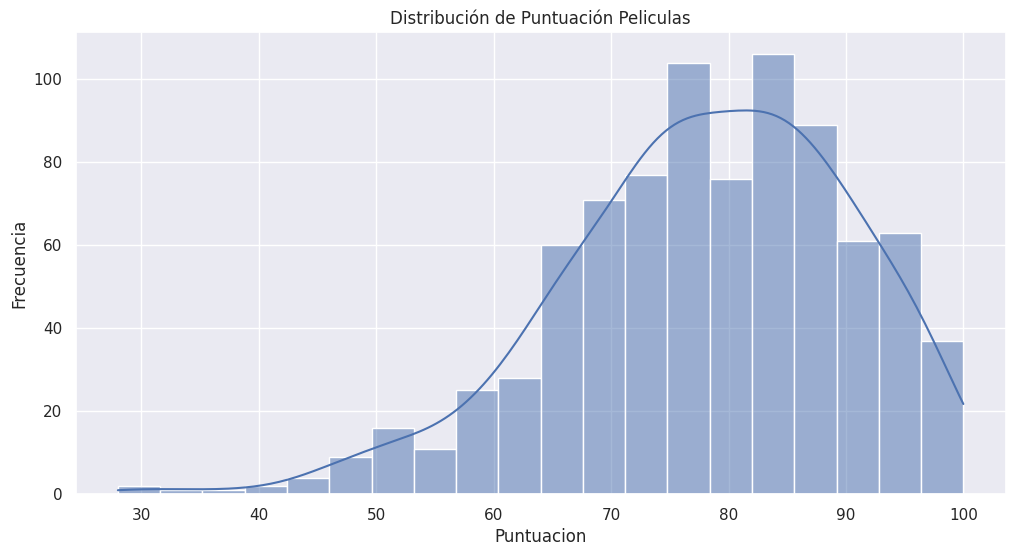

In [ ]:
#Meta_Score
plt.figure(figsize=(12,6))
sns.histplot(df['Meta_score'], bins=20, kde=True)
plt.title('Distribución de Puntuación Peliculas')
plt.xlabel('Puntuacion')
plt.ylabel('Frecuencia')
plt.show()

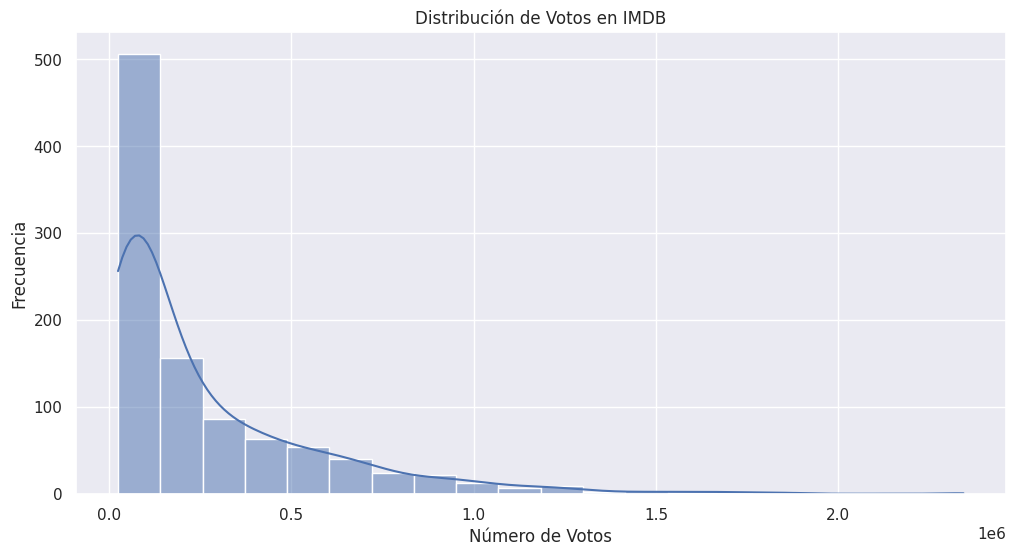

In [ ]:
#No_of_votes
plt.figure(figsize=(12,6))
sns.histplot(df['No_of_Votes'], bins=20, kde=True)
plt.title('Distribución de Votos en IMDB')
plt.xlabel('Número de Votos')
plt.ylabel('Frecuencia')
plt.show()

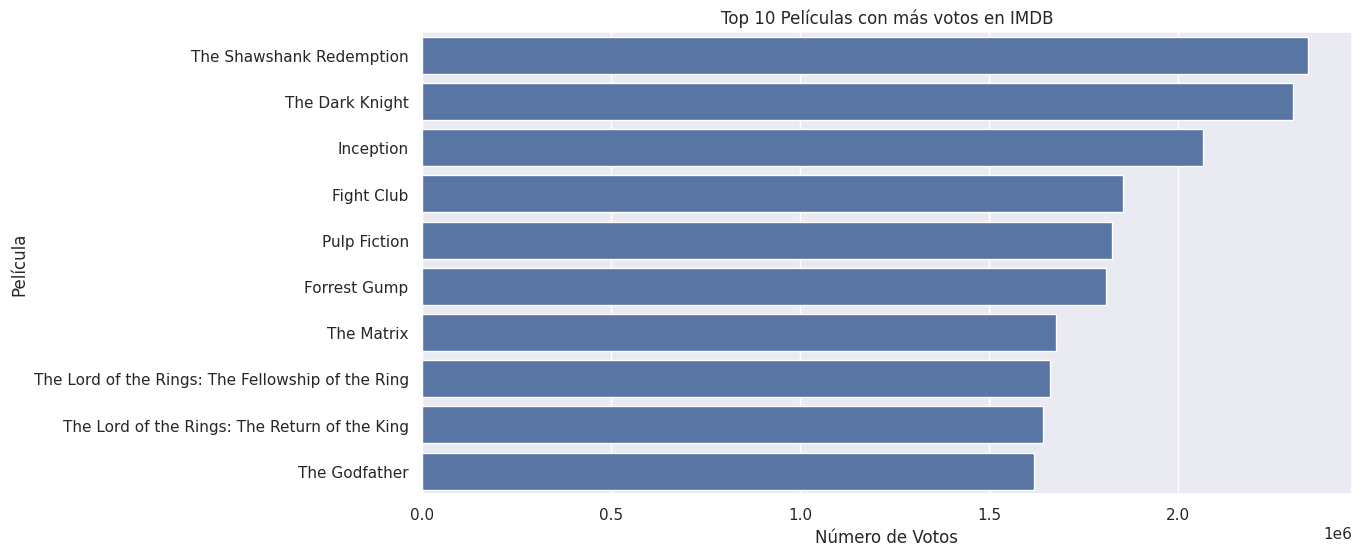

In [ ]:
#Top 10 peliculas con mas votos en IMBD
top_movies = df.sort_values(by='No_of_Votes', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_movies['No_of_Votes'], y=top_movies['Series_Title'])
plt.title('Top 10 Películas con más votos en IMDB')
plt.xlabel('Número de Votos')
plt.ylabel('Película')
plt.show()

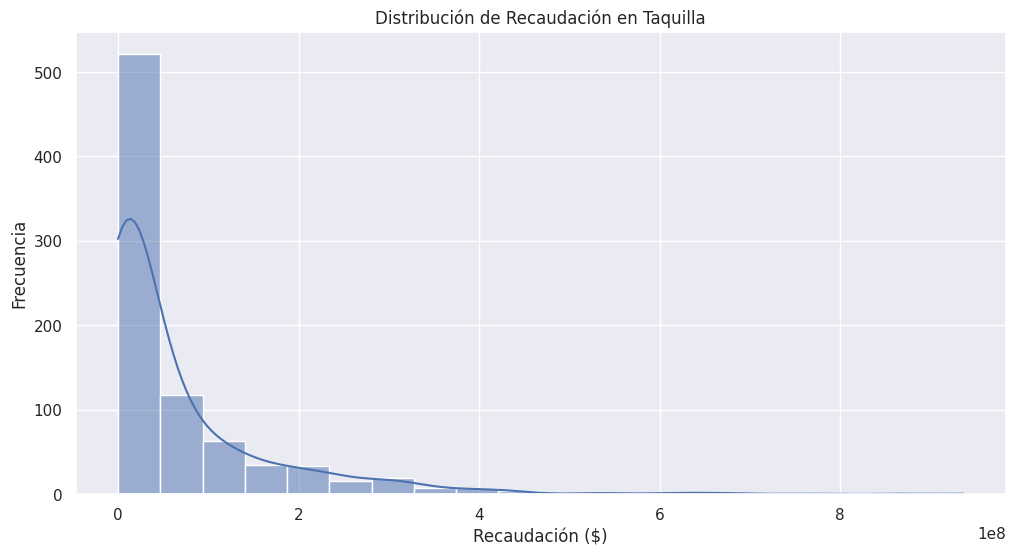

In [ ]:
#Gross (Recaudacion)
df['Gross'] = df['Gross'].replace(',', '', regex=True).astype(float)
plt.figure(figsize=(12,6))
sns.histplot(df['Gross'].dropna(), bins=20, kde=True)
plt.title('Distribución de Recaudación en Taquilla')
plt.xlabel('Recaudación ($)')
plt.ylabel('Frecuencia')
plt.show()

# **SEGUNDA ENTREGA**


LIBRERIAS

In [ ]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
sns.set_theme()
from sklearn.model_selection import KFold
from sklearn.metrics import *
df = pd.read_csv("movie.csv")

## **1. CLASIFICACIÓN**
Estimadores: DT, RF y SVM, sin parámetros. Calcular accuracy ó MAE según el caso.


## TIPOS DE CERTIFICADOS (17)

* A: Certificado para películas aptas para todos los públicos,en países como India.
* UA: Certificado para películas aptas para mayores de 12 años, en India.
* U: Películas aptas para todos los públicos, usualmente en India.
* PG-13: Películas aptas para mayores de 13 años, usado en EE.UU.
* R: Películas restringidas a mayores de 17 o 18 años, en EE.UU.
* nan: Falta información.
* PG: Películas aptas para audiencias generales, pero con ciertas restricciones en EE.UU.
* G: Películas aptas para todos los públicos, común en EE.UU.
* Passed: Certificado que indica que una película ha sido aprobada, generalmente en el Reino Unido.
* TV-14: Para contenidos de televisión, apto para mayores de 14 años, EE.UU.
* 16: Para contenido apto para mayores de 16 años, usado en países europeos.
* TV-MA: Certificado para contenidos de televisión exclusivamente para adultos, en EE.UU.
* Unrated: Sin clasificación oficial, comúnmente en EE.UU.
* GP: Generalmente aceptable, usado antiguamente en EE.UU.
* Approved: Certificación para contenidos aprobados, India.
* TV-PG: Para televisión, programación general con ciertas advertencias, EE.UU.
* U/A: Apto para mayores de 7 años, India.



In [ ]:
for column in movies_df.columns:
print(f"Cantidad de valores únicos en la columna '{column}': {pd.unique(movies_df[column]).shape[0]}")
print("Cantidad de certificados",pd.unique(df['Certificate']))
print("Cantidad de IMDB_Rating",pd.unique(df['IMDB_Rating']))

Cantidad de valores únicos en la columna 'rank': 1000
Cantidad de valores únicos en la columna 'Series_Title': 999
Cantidad de valores únicos en la columna 'Released_Year': 100
Cantidad de valores únicos en la columna 'Certificate': 17
Cantidad de valores únicos en la columna 'Runtime': 140
Cantidad de valores únicos en la columna 'Genre': 202
Cantidad de valores únicos en la columna 'IMDB_Rating': 17
Cantidad de valores únicos en la columna 'Overview': 1000
Cantidad de valores únicos en la columna 'Meta_score': 64
Cantidad de valores únicos en la columna 'Director': 548
Cantidad de valores únicos en la columna 'Star1': 660
Cantidad de valores únicos en la columna 'Star2': 841
Cantidad de valores únicos en la columna 'Star3': 891
Cantidad de valores únicos en la columna 'Star4': 939
Cantidad de valores únicos en la columna 'No_of_Votes': 999
Cantidad de valores únicos en la columna 'Gross': 824
Cantidad de certificados ['A' 'UA' 'U' 'PG-13' 'R' nan 'PG' 'G' 'Passed' 'TV-14' '16' 'TV-MA

### Para la Columna 'Certificate'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

movies_df = pd.read_csv('/content/movie.csv')

movies_df['Certificate'] = movies_df['Certificate'].fillna('Unknown')

features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']
X = movies_df[features]
y = movies_df['Certificate']

X = X.fillna(X.mean())
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy de Decision Tree: {accuracy_dt * 100 :.2f}%")
print(f"Accuracy de Random Forest: {accuracy_rf * 100 :.2f}%")
print(f"Accuracy de SVM: {accuracy_svm * 100 :.2f}%")

Accuracy de Decision Tree: 21.50%
Accuracy de Random Forest: 26.00%
Accuracy de SVM: 21.00%


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

movies_df = pd.read_csv('movie.csv')

movies_df['Certificate'] = movies_df['Certificate'].fillna('Unknown')

movies_df['Runtime'] = movies_df['Runtime'].str.replace(' min', '').astype(int)
movies_df['Gross'] = movies_df['Gross'].replace({',': ''}, regex=True).astype(float)

features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes', 'Runtime', 'Gross']

X = movies_df[features]
y = LabelEncoder().fit_transform(movies_df['Certificate'])

imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=21)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

print(f"Accuracy de Decision Tree: {accuracy_dt * 100:.2f}%")

Accuracy de Decision Tree: 28.50%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=21)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print(f"Accuracy de Random Forest: {accuracy_rf * 100:.2f}%")

Accuracy de Random Forest: 35.50%


In [ ]:
from sklearn.svm import SVC

svc_model = SVC(random_state=21)
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

print(f"Accuracy de SVC: {accuracy_svc * 100:.2f}%")

Accuracy de SVC: 29.50%


### Para la columna 'IMDB_Rating'

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

movies_df = pd.read_csv('/content/movie.csv')

movies_df['IMDB_Rating'] = movies_df['IMDB_Rating'].fillna(movies_df['IMDB_Rating'].mean())

movies_df['Runtime'] = movies_df['Runtime'].str.replace(' min', '').astype(int)    # Convertir la columna 'Runtime' a valores numéricos (eliminando "min")

features = ['Meta_score', 'Runtime', 'No_of_Votes']
X = movies_df[features]
y = movies_df['IMDB_Rating']

y = pd.cut(y, bins=5, labels=[0, 1, 2, 3, 4])  # Discretize 'IMDB_Rating' en 5 clases

X = X.fillna(X.mean())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

print(f"Accuracy de Decision Tree: {accuracy_dt * 100:.2f}%")
print(f"Accuracy de Random Forest: {accuracy_rf * 100:.2f}%")
print(f"Accuracy de SVM: {accuracy_svm * 100:.2f}%")

Accuracy de Decision Tree: 54.00%
Accuracy de Random Forest: 59.50%
Accuracy de SVM: 53.00%


## **2. Learning Curves**

2. Learning curves (generar las gráficas vistas en clase, basadas en un entrenamiento clásico, o particionado train_test_split):
* DT ---> max_depth
* RF ---> n_estimators
* SVM ---> kernel


### DT ---> max_depth

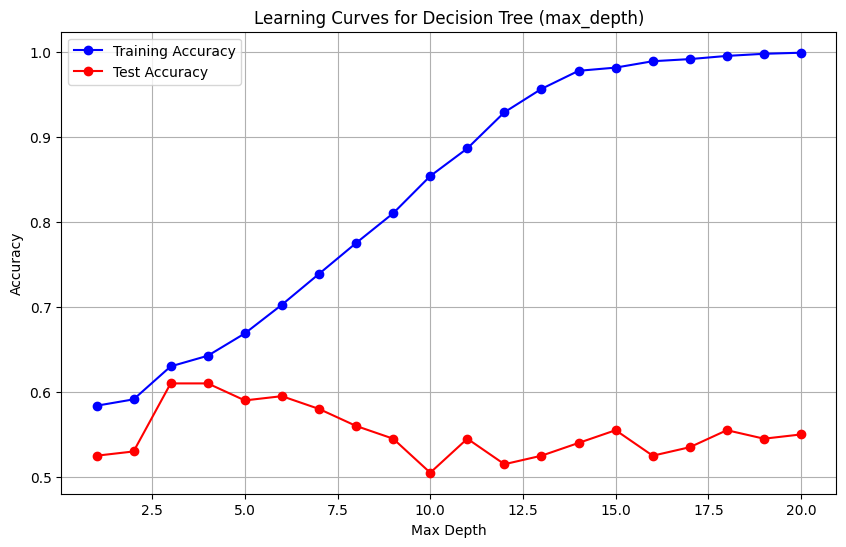

In [ ]:
#DT Max_depth
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

max_depth_values = range(1, 21)

train_accuracies = []
test_accuracies = []

for max_depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=max_depth, random_state=21)
    dt_model.fit(X_train, y_train)

    y_pred_train = dt_model.predict(X_train)
    y_pred_test = dt_model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracies, label='Training Accuracy', color='blue', marker='o')
plt.plot(max_depth_values, test_accuracies, label='Test Accuracy', color='red', marker='o')
plt.title('Learning Curves for Decision Tree (max_depth)')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### RF ---> n_estimators

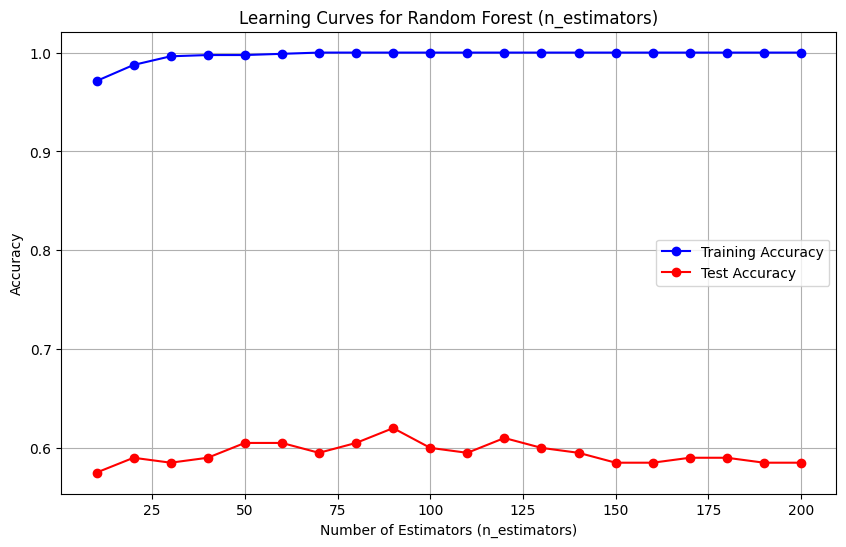

In [ ]:
#Randon Forest
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

n_estimators_values = range(10, 210, 10)  # Probe valores entre 10 y 200

train_accuracies_rf = []
test_accuracies_rf = []

for n_estimators in n_estimators_values:
    rf_model = RandomForestClassifier(n_estimators=n_estimators, random_state=21)
    rf_model.fit(X_train, y_train)

    y_pred_train_rf = rf_model.predict(X_train)
    y_pred_test_rf = rf_model.predict(X_test)

    train_accuracy_rf = accuracy_score(y_train, y_pred_train_rf)
    test_accuracy_rf = accuracy_score(y_test, y_pred_test_rf)

    train_accuracies_rf.append(train_accuracy_rf)
    test_accuracies_rf.append(test_accuracy_rf)

plt.figure(figsize=(10, 6))
plt.plot(n_estimators_values, train_accuracies_rf, label='Training Accuracy', color='blue', marker='o')
plt.plot(n_estimators_values, test_accuracies_rf, label='Test Accuracy', color='red', marker='o')
plt.title('Learning Curves for Random Forest (n_estimators)')
plt.xlabel('Number of Estimators (n_estimators)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

### SVM ---> kernel

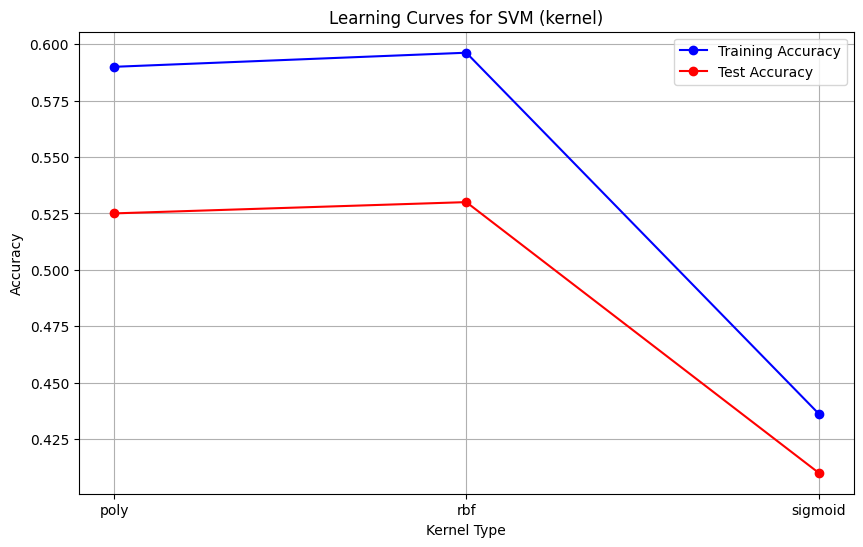

In [ ]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

kernels = ['poly', 'rbf', 'sigmoid']      #Cambiar solo esto uno por uno ['linear', 'poly', 'rbf', 'sigmoid']

train_accuracies_svm = []
test_accuracies_svm = []

for kernel in kernels:

    svm_model = SVC(kernel=kernel, random_state=21)
    svm_model.fit(X_train, y_train)

    y_pred_train_svm = svm_model.predict(X_train)
    y_pred_test_svm = svm_model.predict(X_test)

    train_accuracy_svm = accuracy_score(y_train, y_pred_train_svm)
    test_accuracy_svm = accuracy_score(y_test, y_pred_test_svm)

    train_accuracies_svm.append(train_accuracy_svm)
    test_accuracies_svm.append(test_accuracy_svm)


plt.figure(figsize=(10, 6))
plt.plot(kernels, train_accuracies_svm, label='Training Accuracy', color='blue', marker='o')
plt.plot(kernels, test_accuracies_svm, label='Test Accuracy', color='red', marker='o')
plt.title('Learning Curves for SVM (kernel)')
plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

## **3. Cross Validation**

Dataset Clasicos.
- Learning curves para CROSS-validation (buscar el mejor k ó n-folds), solamente con DT.

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=6.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=7.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=9.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/skle

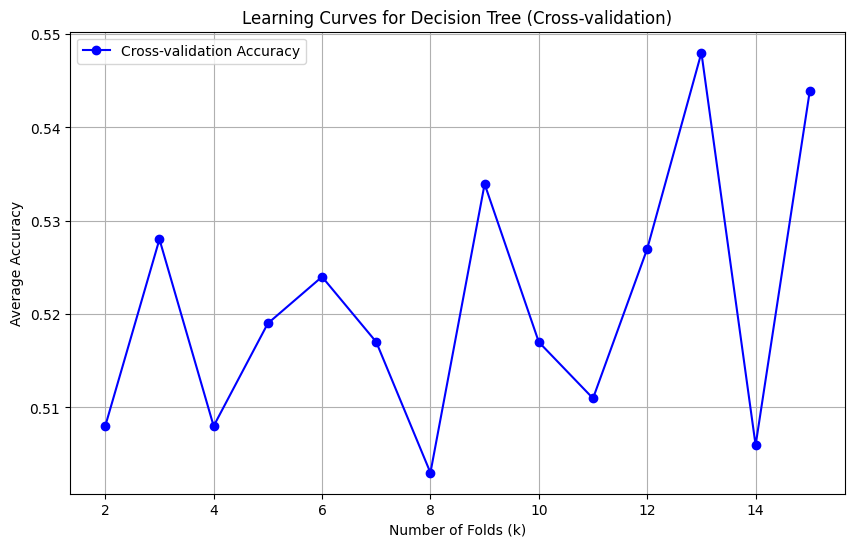

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np

k_values = range(2, 16)  # Probar entre 2 y 16 folds

cv_accuracies = []

# Entrenamiento y evaluación con cross-validation para cada valor de k
for k in k_values:

    dt_model = DecisionTreeClassifier(random_state=21)
    cv_scores = cross_val_score(dt_model, X, y, cv=k, scoring='accuracy')

    mean_cv_score = np.mean(cv_scores)
    cv_accuracies.append(mean_cv_score)

plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_accuracies, label='Cross-validation Accuracy', color='blue', marker='o')
plt.title('Learning Curves for Decision Tree (Cross-validation)')
plt.xlabel('Number of Folds (k)')
plt.ylabel('Average Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# TERCERA ENTREGA


### PUNTO 1

**1. Implementar su tarea de clasificación o regresión con una red neuronal, con las siguientes configuraciones:**

- 3 capas ocultas, 128 neuronas, relu
- 6 capas ocultas, 128 neuronas, relu
- 10 capas ocultas, 128 neuronas, relu
Y entrenar por 10 epoch, con el optimizador, la función de pérdida que considere coherente (guiarse por los notebooks 12 y 13) y la métrica adecuada (accuracy o error).

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Cargar datos
movies_df = pd.read_csv("movie.csv")
features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']
X = movies_df[features]
y = movies_df['Certificate']

# 2. Preprocesamiento
X = X.dropna()
y = y[X.index]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_categorical, test_size=0.2, random_state=21)

# 3. Función para crear modelo
def build_model(num_layers):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(128, activation='relu'))
    model.add(Dense(y_train.shape[1], activation='softmax'))
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# 4. Entrenar y evaluar modelos
for layers in [3, 6, 10]:
    print(f"\nEntrenando modelo con {layers} capas ocultas:")
    model = build_model(layers)
    history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    porcentaje = test_acc * 100
    print(f"Precisión en test: {test_acc:.4f}")
    print(f"Precisión de test en porcentaje: {porcentaje:.4f}%")



Entrenando modelo con 3 capas ocultas:
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.1936 - loss: 2.5077 - val_accuracy: 0.1716 - val_loss: 2.2249
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2462 - loss: 2.0407 - val_accuracy: 0.1893 - val_loss: 2.0783
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3512 - loss: 1.8442 - val_accuracy: 0.2071 - val_loss: 2.0122
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3431 - loss: 1.7553 - val_accuracy: 0.2604 - val_loss: 1.9778
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3256 - loss: 1.7832 - val_accuracy: 0.2249 - val_loss: 1.9580
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3331 - loss: 1.7578 - val_accuracy: 0.1893 - val_loss: 1.9726
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3138 - loss: 1.7373 - val_accuracy: 0.2308 - val_loss: 1.9536
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3064 - loss: 1.7689 - val_accuracy: 0.2426 - val_loss: 1.9512


### PUNTO 2


**2. Reducir la dimensionalidad de su dataset con PCA (n_components=2), e implementar sobre su dataset los algoritmos K-Means (n_clusters=3) y DBSCAN (min_samples=2).**

- Plotear los resultados con scatter. Plotear también los centroides.

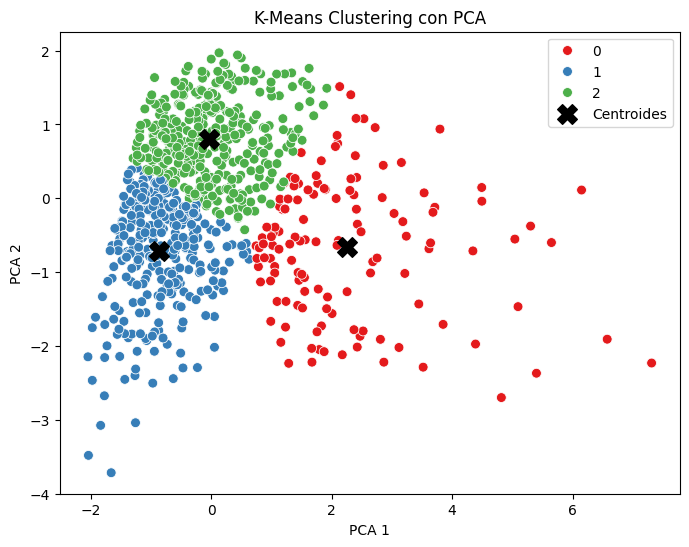

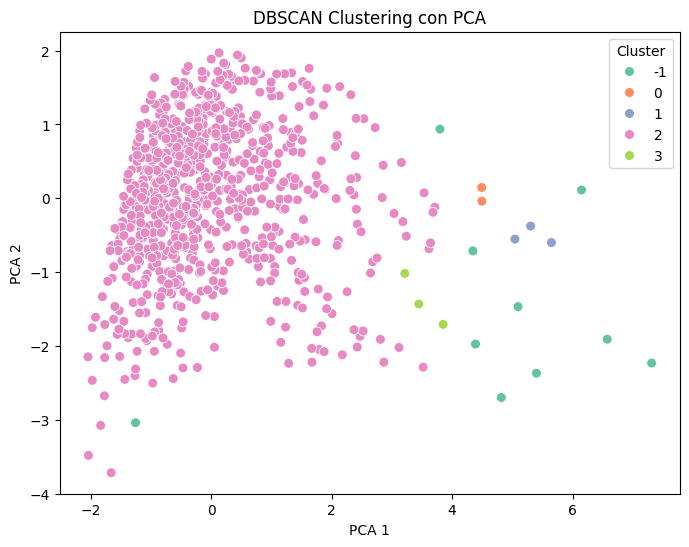

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN

features = ['IMDB_Rating', 'Meta_score', 'No_of_Votes']
X = movies_df[features]

X = X.dropna()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# ===== K-MEANS =====
kmeans = KMeans(n_clusters=3, random_state=21)
kmeans_labels = kmeans.fit_predict(X_pca)
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='Set1', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroides')
plt.title('K-Means Clustering con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend()
plt.show()

# ===== DBSCAN =====
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan_labels = dbscan.fit_predict(X_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette='Set2', s=50)
plt.title('DBSCAN Clustering con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()